# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## please add the essential libraries
import numpy as np
import os
import subprocess
import tensorflow 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from posix import listdir
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [ ]:
!pwd

/content


In [ ]:
#Setting working directory
root_dir = '/content/drive/MyDrive/CSE574ML/Assignment5/'
os.chdir(root_dir)
!pwd

/content/drive/MyDrive/CSE574ML/Assignment5


In [ ]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224  #input_shape
train_data_dir      = 'pictures/train/'
validation_data_dir = 'pictures/val/'
test_data_dir       = 'pictures/test/'

epochs = 50
batch_size = 16

In [ ]:
# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data

datagen = ImageDataGenerator(rescale=1./255)

# Your Code HERE
train_generator =  datagen.flow_from_directory(
        root_dir+train_data_dir,  #Target directory
        target_size=(224, 224),  #Using input_shape as given
        shuffle=True,  #Shuffing the data
        batch_size=batch_size,
        class_mode='categorical')
valid_generator =  datagen.flow_from_directory(
        root_dir+validation_data_dir,  #Target directory
        target_size=(224, 224),  #Using input_shape as given
        shuffle=True,  #Shuffing the data
        batch_size=batch_size,
        class_mode='categorical')
test_generator  = datagen.flow_from_directory(
        root_dir+test_data_dir,  #Target directory
        target_size=(224, 224),  #Using input_shape as given
        shuffle=True,  #Shuffing the data
        batch_size=batch_size)
        #class_mode='categorical')


Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [ ]:
#Saving the input shape into a variable
input_shape = train_generator.image_shape
input_shape

(224, 224, 3)

In [ ]:
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
# Your Code HERE
model = tf.keras.models.Sequential([
    
    # input layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape, use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),

    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),

    # layer 2
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu', use_bias=True),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax', use_bias=True)
    
])


In [ ]:
#Checking model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
#compile
n_epochs = epochs
optimizer = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Training the model on training and validation data set

history = model.fit(train_generator,
          epochs=epochs,
          validation_data=valid_generator,
          batch_size=batch_size,
          callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=20)])

Epoch 1/50
261/261 [==============================] - 962s 4s/step - loss: 0.6079 - accuracy: 0.8278 - val_loss: 0.8323 - val_accuracy: 0.8053
Epoch 2/50
261/261 [==============================] - 29s 111ms/step - loss: 0.0243 - accuracy: 0.9945 - val_loss: 0.8636 - val_accuracy: 0.8305
Epoch 3/50
261/261 [==============================] - 29s 111ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 1.4102 - val_accuracy: 0.8290
Epoch 4/50
261/261 [==============================] - 29s 111ms/step - loss: 1.4517e-07 - accuracy: 1.0000 - val_loss: 2.4133 - val_accuracy: 0.8326
Epoch 5/50
261/261 [==============================] - 29s 111ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3991 - val_accuracy: 0.8326
Epoch 6/50
261/261 [==============================] - 29s 111ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3855 - val_accuracy: 0.8319
Epoch 7/50
261/261 [==============================] - 29s 111ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2

Text(0.5, 0, 'epoch')

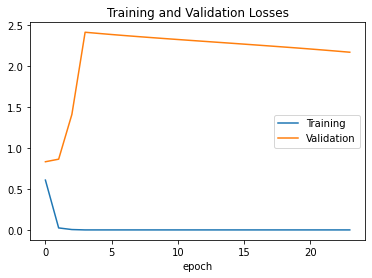

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

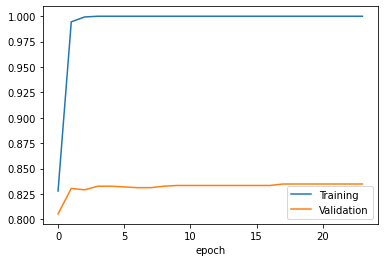

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')


%Test

In [ ]:
#Test the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

87/87 [==============================] - 268s 3s/step - loss: 2.7129 - accuracy: 0.8053
Test loss: 2.712902784347534 Test Acc: 0.8053160905838013


## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
model_l1 = tf.keras.models.Sequential([
                                       
    # input layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape, use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),

    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),

    # layer 2
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l= 0.01)),
    tf.keras.layers.Dense(10, activation='softmax', use_bias=True)
    
])

In [ ]:
#Checking summary

model_l1.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_122 (MaxPooli  (None, 111, 111, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_123 (Conv2D)         (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_123 (MaxPooli  (None, 54, 54, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 26, 26, 128)    

In [ ]:
#Compile
model_l1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Training the model on traning and validation data

history_l1 = model_l1.fit(train_generator,
          epochs=epochs,
          validation_data=valid_generator,
          batch_size=batch_size,
          callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  patience=20) ])

Epoch 1/50
261/261 [==============================] - 33s 125ms/step - loss: 104.0776 - accuracy: 0.0960 - val_loss: 98.4259 - val_accuracy: 0.1034
Epoch 2/50
261/261 [==============================] - 32s 124ms/step - loss: 101.6698 - accuracy: 0.1212 - val_loss: 102.3104 - val_accuracy: 0.2399
Epoch 3/50
261/261 [==============================] - 32s 124ms/step - loss: 100.7632 - accuracy: 0.5376 - val_loss: 100.9619 - val_accuracy: 0.5639
Epoch 4/50
261/261 [==============================] - 31s 120ms/step - loss: 99.9295 - accuracy: 0.7605 - val_loss: 100.5766 - val_accuracy: 0.5963
Epoch 5/50
261/261 [==============================] - 32s 123ms/step - loss: 99.5920 - accuracy: 0.8472 - val_loss: 100.2009 - val_accuracy: 0.6954
Epoch 6/50
261/261 [==============================] - 32s 121ms/step - loss: 99.4145 - accuracy: 0.8925 - val_loss: 100.4798 - val_accuracy: 0.6774
Epoch 7/50
261/261 [==============================] - 32s 124ms/step - loss: 99.2900 - accuracy: 0.9061 - val_

Text(0.5, 0, 'epoch')

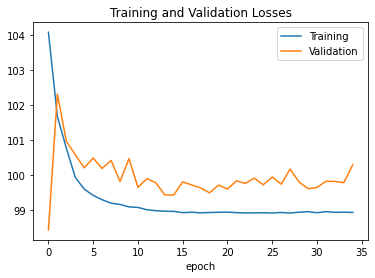

In [ ]:
# Plotting the graph between training and validation loss

plt.plot(history_l1.history['loss'])
plt.plot(history_l1.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

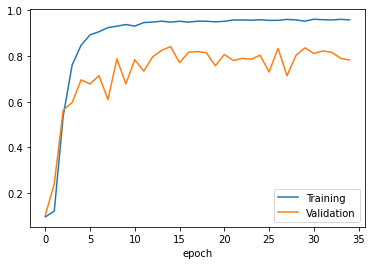

In [ ]:
# Plotting the graph between accuracy and val_accuracy

plt.plot(history_l1.history['accuracy'])
plt.plot(history_l1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [ ]:
#

test_loss, test_acc = model_l1.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

87/87 [==============================] - 8s 88ms/step - loss: 101.4051 - accuracy: 0.6897
Test loss: 101.40511322021484 Test Acc: 0.6896551847457886


## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D
model_l2 = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape, use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True), #kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu', use_bias=True,  kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Dense(10, activation='softmax', use_bias=True)
    
])

In [ ]:
model_l2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 17, 17, 128)    

In [ ]:
model_l2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history_l2 = model_l2.fit(train_generator,
          epochs=epochs,
          validation_data=valid_generator,
          batch_size=batch_size,
          callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  patience=20) ])

Epoch 1/50
261/261 [==============================] - 31s 114ms/step - loss: 1.0535 - accuracy: 0.7440 - val_loss: 0.9087 - val_accuracy: 0.8010
Epoch 2/50
261/261 [==============================] - 29s 111ms/step - loss: 0.2549 - accuracy: 0.9655 - val_loss: 1.0651 - val_accuracy: 0.8269
Epoch 3/50
261/261 [==============================] - 30s 115ms/step - loss: 0.1594 - accuracy: 0.9808 - val_loss: 0.8600 - val_accuracy: 0.8599
Epoch 4/50
261/261 [==============================] - 29s 111ms/step - loss: 0.1279 - accuracy: 0.9816 - val_loss: 0.6024 - val_accuracy: 0.8420
Epoch 5/50
261/261 [==============================] - 29s 110ms/step - loss: 0.0997 - accuracy: 0.9849 - val_loss: 0.9524 - val_accuracy: 0.8197
Epoch 6/50
261/261 [==============================] - 29s 112ms/step - loss: 0.0920 - accuracy: 0.9856 - val_loss: 0.8169 - val_accuracy: 0.8312
Epoch 7/50
261/261 [==============================] - 30s 113ms/step - loss: 0.0928 - accuracy: 0.9859 - val_loss: 0.8933 - val_ac

Text(0.5, 0, 'epoch')

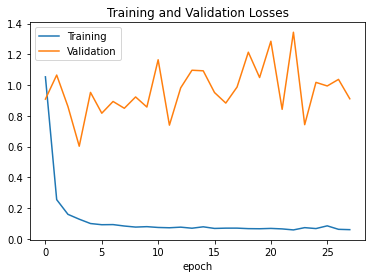

In [ ]:
plt.plot(history_l2.history['loss'])
plt.plot(history_l2.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

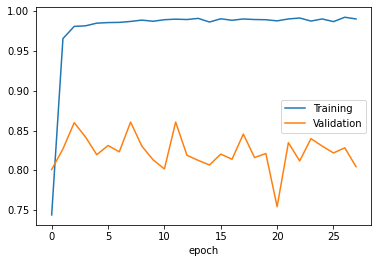

In [ ]:
plt.plot(history_l2.history['accuracy'])
plt.plot(history_l2.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model_l2.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

87/87 [==============================] - 7s 78ms/step - loss: 1.5737 - accuracy: 0.7356
Test loss: 1.573713779449463 Test Acc: 0.7356321811676025


## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [ ]:
import keras
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
#model
resnetModel = Sequential()

In [ ]:
#loading the pretrained model
pretrainedModel = ResNet50(weights="imagenet", include_top=False)

In [ ]:
# summarize the pretrained model
pretrainedModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
resnetModel1 = Sequential()

In [ ]:
#defining our model
pretrainedModel1 = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape, classes=10)

#Using ResNet50 on our dataset
resnetModel1.add(pretrainedModel1)
resnetModel1.add(Flatten())

resnetModel1.add(Dense(16, activation="relu"))
resnetModel1.add(Dense(10, activation="softmax"))

In [ ]:
pretrainedModel1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
resnetModel1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Training the model with training and validation set
history_ResNet = resnetModel1.fit(train_generator,
          epochs=epochs,
          validation_data=valid_generator,
          batch_size=batch_size,
          callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  patience=20) ])

Epoch 1/50
261/261 [==============================] - 50s 139ms/step - loss: 2.1370 - accuracy: 0.4068 - val_loss: 2.3060 - val_accuracy: 0.0862
Epoch 2/50
261/261 [==============================] - 36s 138ms/step - loss: 0.6368 - accuracy: 0.8032 - val_loss: 2.3107 - val_accuracy: 0.0862
Epoch 3/50
261/261 [==============================] - 35s 135ms/step - loss: 0.4205 - accuracy: 0.8834 - val_loss: 2.0100 - val_accuracy: 0.3915
Epoch 4/50
261/261 [==============================] - 40s 155ms/step - loss: 0.3514 - accuracy: 0.9047 - val_loss: 10.2838 - val_accuracy: 0.6638
Epoch 5/50
261/261 [==============================] - 37s 140ms/step - loss: 0.2636 - accuracy: 0.9428 - val_loss: 1.8014 - val_accuracy: 0.8585
Epoch 6/50
261/261 [==============================] - 35s 135ms/step - loss: 0.1770 - accuracy: 0.9691 - val_loss: 2.8518 - val_accuracy: 0.7335
Epoch 7/50
261/261 [==============================] - 36s 136ms/step - loss: 0.1200 - accuracy: 0.9825 - val_loss: 6.1136 - val_a

Text(0.5, 0, 'epoch')

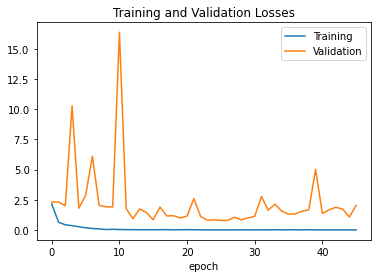

In [ ]:
#plotting the training and validation loss
plt.plot(history_ResNet.history['loss'])
plt.plot(history_ResNet.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

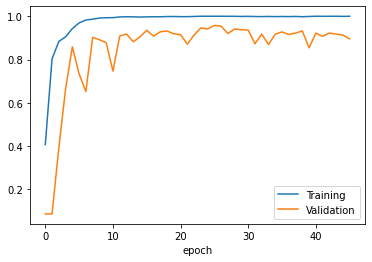

In [ ]:
#plotting the tarning and validation accuracy
plt.plot(history_ResNet.history['accuracy'])
plt.plot(history_ResNet.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = resnetModel1.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

87/87 [==============================] - 8s 89ms/step - loss: 2.3961 - accuracy: 0.8851
Test loss: 2.396061897277832 Test Acc: 0.8850574493408203


In [ ]:
#Freezing the layers
for layer in pretrainedModel.layers:
    layer.trainable = False

resnetModel1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Training the model with training and validation set
history_ResNet = resnetModel1.fit(train_generator,
          epochs=epochs,
          validation_data=valid_generator,
          batch_size=batch_size,
          callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  patience=20) ])


Epoch 1/50
261/261 [==============================] - 48s 137ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.9587 - val_accuracy: 0.9418
Epoch 2/50
261/261 [==============================] - 34s 132ms/step - loss: 2.8546e-09 - accuracy: 1.0000 - val_loss: 0.9737 - val_accuracy: 0.9404
Epoch 3/50
261/261 [==============================] - 34s 132ms/step - loss: 1.1419e-10 - accuracy: 1.0000 - val_loss: 0.9623 - val_accuracy: 0.9411
Epoch 4/50
261/261 [==============================] - 35s 134ms/step - loss: 7.1366e-10 - accuracy: 1.0000 - val_loss: 0.9562 - val_accuracy: 0.9397
Epoch 5/50
261/261 [==============================] - 35s 135ms/step - loss: 2.8660e-08 - accuracy: 1.0000 - val_loss: 1.0566 - val_accuracy: 0.9332
Epoch 6/50
261/261 [==============================] - 35s 132ms/step - loss: 3.4111e-08 - accuracy: 1.0000 - val_loss: 0.9547 - val_accuracy: 0.9447
Epoch 7/50
261/261 [==============================] - 34s 131ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - v

Text(0.5, 0, 'epoch')

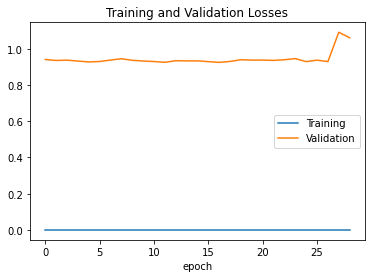

In [ ]:
#plotting the training and validation loss
plt.plot(history_ResNet.history['loss'])
plt.plot(history_ResNet.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

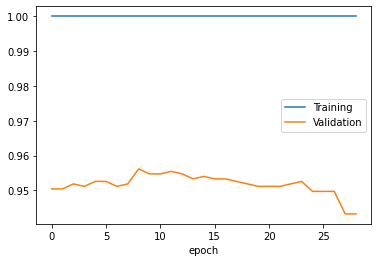

In [ ]:
#plotting the tarning and validation accuracy
plt.plot(history_ResNet.history['accuracy'])
plt.plot(history_ResNet.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = resnetModel1.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

87/87 [==============================] - 8s 88ms/step - loss: 0.8069 - accuracy: 0.9511
Test loss: 0.8068860769271851 Test Acc: 0.9511494040489197


In [ ]:
# #Unfreeze attempt 1
# for layer in pretrainedModel.layers[-26:]:
#     layer.trainable = True

# # #Unfreeze attempt 2
# for layer in pretrainedModel.layers[-30:]:
#     layer.trainable = True

# #Unfreeze attempt 2
for layer in pretrainedModel.layers[-12:]:
    layer.trainable = True

In [ ]:
# Compiling the new model
resnetModel1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Training the model with training and validation set
history_ResNet = resnetModel1.fit(train_generator,
          epochs=epochs,
          validation_data=valid_generator,
          batch_size=batch_size,
          callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  patience=20)])

Epoch 1/50
261/261 [==============================] - 49s 139ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9446 - val_accuracy: 0.9583
Epoch 2/50
261/261 [==============================] - 35s 134ms/step - loss: 2.5692e-10 - accuracy: 1.0000 - val_loss: 0.9431 - val_accuracy: 0.9612
Epoch 3/50
261/261 [==============================] - 35s 135ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9485 - val_accuracy: 0.9612
Epoch 4/50
261/261 [==============================] - 35s 135ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9413 - val_accuracy: 0.9598
Epoch 5/50
261/261 [==============================] - 36s 138ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9393 - val_accuracy: 0.9591
Epoch 6/50
261/261 [==============================] - 35s 136ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9406 - val_accuracy: 0.9598
Epoch 7/50
261/261 [==============================] - 35s 134ms/step - loss: 0.0000e+00 - accuracy: 1.0000

Text(0.5, 0, 'epoch')

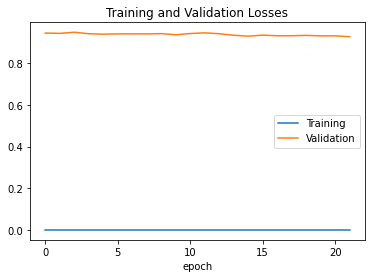

In [ ]:
#plotting the training and validation loss
plt.plot(history_ResNet.history['loss'])
plt.plot(history_ResNet.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

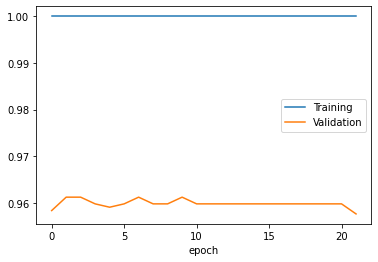

In [ ]:
#plotting the tarning and validation accuracy
plt.plot(history_ResNet.history['accuracy'])
plt.plot(history_ResNet.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = resnetModel1.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

87/87 [==============================] - 8s 94ms/step - loss: 0.8149 - accuracy: 0.9526
Test loss: 0.8149346709251404 Test Acc: 0.9525862336158752
